**DISASTER DATA MINING BASED ON SOCIAL MEDIA TEXTS**

In [ ]:
# importing the libraries for data processing
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
%matplotlib inline
plt.style.use('fivethirtyeight')
warnings.filterwarnings('ignore')
import plotly.offline as py
py.init_notebook_mode(connected=True)
import plotly.graph_objs as go
sns.set()
import re
import nltk
# color pallette
cnf = '#393e46' # confirmed - grey
dth = '#ff2e63' # death - red
rec = '#21bf73' # recovered - cyan
act = '#fe9801' # active case - yellow

# converter
from pandas.plotting import register_matplotlib_converters
register_matplotlib_converters()   

# hide warnings
import warnings
warnings.filterwarnings('ignore')


# html embedding
from IPython.display import Javascript
from IPython.core.display import display
from IPython.core.display import HTML

In [ ]:
tweets = pd.read_csv('/content/preprocessed_tweets.csv',lineterminator='\n')


In [ ]:
tweets = tweets.dropna(subset=['video'])

In [ ]:
tweets['index'] = range(1, len(tweets) + 1)

In [ ]:
num_train = len(tweets)//3
num_test = len(tweets) - num_train

In [ ]:
print(num_train)
print(num_test)

43391
86783


In [ ]:
train = tweets[:num_test]
test = tweets[num_test:]

In [ ]:
len(tweets)

130174

In [ ]:
train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 86783 entries, 0 to 86782
Data columns (total 38 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Unnamed: 0       86783 non-null  int64  
 1   id               86783 non-null  int64  
 2   conversation_id  86783 non-null  int64  
 3   created_at       86783 non-null  object 
 4   date             86783 non-null  object 
 5   time             86783 non-null  object 
 6   timezone         86783 non-null  int64  
 7   user_id          86783 non-null  int64  
 8   username         86783 non-null  object 
 9   name             86781 non-null  object 
 10  place            139 non-null    object 
 11  tweet            86783 non-null  object 
 12  language         86783 non-null  object 
 13  mentions         86783 non-null  object 
 14  urls             86783 non-null  object 
 15  photos           86783 non-null  object 
 16  replies_count    86783 non-null  int64  
 17  retweets_cou

In [ ]:
train.tail()

,Unnamed: 0,id,conversation_id,created_at,date,time,timezone,user_id,username,name,...,source,user_rt_id,user_rt,retweet_id,reply_to,retweet_date,translate,trans_src,trans_dest,index
86778,86778,1590323812541009923,1590313972330561536,2022-11-09 12:41:58+00:00,2022-11-09,12:41:58,0,1485625346519097344,spacecrystalz,𝔛𝔱𝔯𝔞𝔗𝔢𝔯𝔯𝔢𝔰𝔱𝔦𝔞𝔩 🪐🔭♓️,...,NaN,NaN,NaN,NaN,"[{'screen_name': 'catturd2', 'name': 'Catturd ...",NaN,NaN,NaN,NaN,86779
86779,86779,1590323809995096065,1590323809995096064,2022-11-09 12:41:57+00:00,2022-11-09,12:41:57,0,40121018,mscierab,Cee❤️,...,NaN,NaN,NaN,NaN,[],NaN,NaN,NaN,NaN,86780
86780,86780,1590323807889149952,1590323807889149952,2022-11-09 12:41:57+00:00,2022-11-09,12:41:57,0,9721292,abc15,ABC15 Arizona,...,NaN,NaN,NaN,NaN,[],NaN,NaN,NaN,NaN,86781
86781,86781,1590323789791137792,1590323789791137792,2022-11-09 12:41:52+00:00,2022-11-09,12:41:52,0,1295373381211230208,saturnownsyou,camONG,...,NaN,NaN,NaN,NaN,[],NaN,NaN,NaN,NaN,86782
86782,86782,1590323784703410176,1590323784703410176,2022-11-09 12:41:51+00:00,2022-11-09,12:41:51,0,1540958739112796160,goddammnittt,Miss Messy,...,NaN,NaN,NaN,NaN,[],NaN,NaN,NaN,NaN,86783


In [ ]:
train.head()

,Unnamed: 0,id,conversation_id,created_at,date,time,timezone,user_id,username,name,...,source,user_rt_id,user_rt,retweet_id,reply_to,retweet_date,translate,trans_src,trans_dest,index
0,0,1590796436685217792,1590796436685217792,2022-11-10 20:00:00+00:00,2022-11-10,20:00:00,0,753318075886338048,healthycollier,FL Health Collier,...,NaN,NaN,NaN,NaN,[],NaN,NaN,NaN,NaN,1
1,1,1590796436685217792,1590796436685217792,2022-11-10 20:00:00+00:00,2022-11-10,20:00:00,0,753318075886338048,healthycollier,FL Health Collier,...,NaN,NaN,NaN,NaN,[],NaN,NaN,NaN,NaN,2
2,2,1588258851232546817,1588256415440728064,2022-11-03 19:56:33+00:00,2022-11-03,19:56:33,0,784370497412800512,charlottecofl,Charlotte County,...,NaN,NaN,NaN,NaN,"[{'screen_name': 'paradisefound00', 'name': 'J...",NaN,NaN,NaN,NaN,3
3,3,1588255385118736384,1588255385118736384,2022-11-03 19:42:46+00:00,2022-11-03,19:42:46,0,18498416,marymacelveen,MaryMacElveen,...,NaN,NaN,NaN,NaN,[],NaN,NaN,NaN,NaN,4
4,4,1587846074047373313,1587846074047373312,2022-11-02 16:36:19+00:00,2022-11-02,16:36:19,0,753318075886338048,healthycollier,FL Health Collier,...,NaN,NaN,NaN,NaN,[],NaN,NaN,NaN,NaN,5


In [ ]:
# checking for null values in the train and test data

train.isnull().any()
test.isnull().any()

Unnamed: 0         False
id                 False
conversation_id    False
created_at         False
date               False
time               False
timezone           False
user_id            False
username           False
name                True
place               True
tweet              False
language           False
mentions           False
urls               False
photos             False
replies_count      False
retweets_count     False
likes_count        False
hashtags           False
cashtags           False
link               False
retweet            False
quote_url           True
video              False
thumbnail           True
near                True
geo                 True
source              True
user_rt_id          True
user_rt             True
retweet_id          True
reply_to           False
retweet_date        True
translate           True
trans_src           True
trans_dest          True
index              False
dtype: bool

In [ ]:
display(test.dtypes)

Unnamed: 0           int64
id                   int64
conversation_id      int64
created_at          object
date                object
time                object
timezone             int64
user_id              int64
username            object
name                object
place               object
tweet               object
language            object
mentions            object
urls                object
photos              object
replies_count        int64
retweets_count       int64
likes_count          int64
hashtags            object
cashtags            object
link                object
retweet               bool
quote_url           object
video                int64
thumbnail           object
near               float64
geo                float64
source             float64
user_rt_id         float64
user_rt            float64
retweet_id         float64
reply_to            object
retweet_date       float64
translate          float64
trans_src          float64
trans_dest         float64
i

**CLEANING DATASET **

In [ ]:
for df in [train,test]:
    df['tweet'] = df['tweet'].apply(lambda x:re.sub(r'https?://[A-Za-z0-9/:.]+','*',x))
    df['tweet'] = df['tweet'].apply(lambda x:re.sub(r'@[A-Za-z0-9/:._]+','@user',x))
    df['tweet'] = df['tweet'].apply(lambda x:re.sub(r'[0-9]+','0',x))
    df['tweet'] = df['tweet'].apply(lambda x:re.sub(r'\s+',' ',x))
    df['hashtags'] = df['hashtags'].str.replace('%20','_')
    df['tweet'] = df['tweet'] + df['tweet'].apply(lambda x: ' #' + x if not(x is np.nan) else '' )



In [ ]:
len(test)

43391

**SELECTING REQUIRED COLUMNS**

In [ ]:
train=train[["index","id","tweet","hashtags","video"]]
test=test[["index","id","tweet","hashtags","video"]]

**checking for positive sentiments in the train data**

In [ ]:

train[train['video'] == 1].head(10)

,index,id,tweet,hashtags,video
0,1,1590796436685217792,Do you need to talk to someone after #Hurrican...,"['hurricanelan', 'lanrecovery']",1
1,2,1590796436685217792,Do you need to talk to someone after #Hurrican...,"['hurricanelan', 'lanrecovery']",1
4,5,1587846074047373313,Take a few minutes to listen to Kristine Holli...,['hurricanelan'],1
10,11,1586922933158612994,I tweet fast. I make typos. (A lot) At least I...,"['trump', 'fib', 'republican', 'conservative',...",1
11,12,1586922154850934784,I’m the kinda guy who Retweets pictures of his...,"['trump', 'fib', 'republican', 'conservative',...",1
12,13,1586913606528114689,POST IAN update. I made FLORIDA my home nearly...,['hurricanelan'],1
15,16,1586070295366012930,Do you need to talk to someone after #Hurrican...,"['hurricanelan', 'lanrecovery']",1
16,17,1585989058177961984,POV: 0% of our county’s stops signs need corre...,['hurricanelan'],1
17,18,1585760823401746432,"So happy to be at one of my favorite events, t...",['hurricanelan'],1
20,21,1584949200957030401,Direct aid is the essence of UAF. Thank you fa...,['hurricanelan'],1


In [ ]:
#checking for negetive labels in the train data

train[train['video'] == 0].head(10)


,index,id,tweet,hashtags,video
2,3,1588258851232546817,@user 0% of our stops signs in Charlotte Count...,['hurricanelan'],0
3,4,1588255385118736384,Normally I love our thunder and lightening sto...,['hurricanelan'],0
5,6,1587428284467482624,In support of the schools and children impacte...,"['hurricanelan', 'bethebranch']",0
6,7,1587181267891748870,@user Being from Louisiana and a working broke...,['hurricanelan'],0
7,8,1587160699607945217,"@user, technology created in a UF lab, is help...","['hurricanelan', 'uf', 'ufinnovate']",0
8,9,1587135713757233152,The #woke mob is coming for country music star...,"['woke', 'hurricanelan']",0
9,10,1587122239823937536,In support of the schools and children impacte...,['hurricanelan'],0
13,14,1586864374714613760,Let’s get a pulse on this right now. Who are y...,"['trump', 'fib', 'republican', 'conservative',...",0
14,15,1586719661500112896,🚨REMINDER: Pre-registration and phone intervie...,['hurricanelan'],0
18,19,1585657119738658816,@user @user Hello @user Good afternoon. My nam...,['hurricanelan'],0


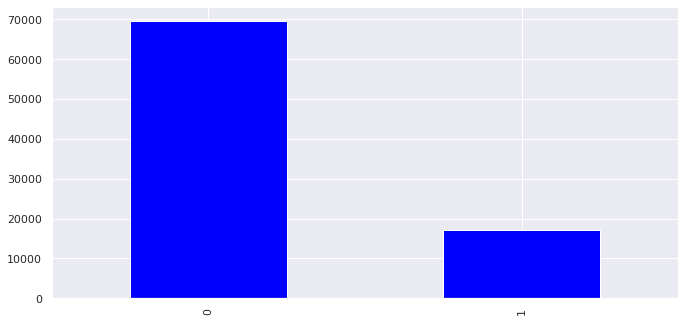

In [ ]:
# checking the distribution of label counts in the train data

train['video'].value_counts().plot.bar(color = 'blue', figsize = (10,5))

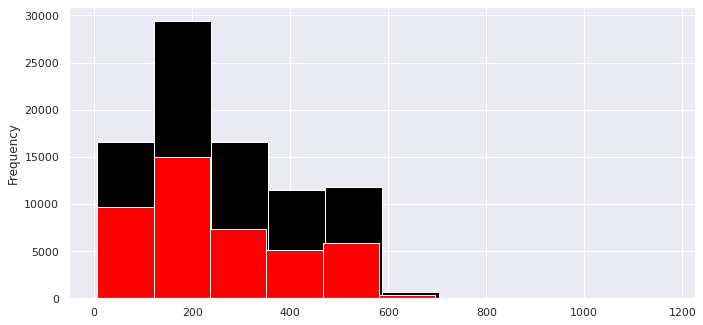

In [ ]:
# checking the distribution of tweets in the whole dataset

length_train = train['tweet'].str.len().plot.hist(color = 'black', figsize = (10, 5))
length_test = test['tweet'].str.len().plot.hist(color = 'red', figsize = (10,5))

In [ ]:
# adding a column to check for the length of the tweet

train['len'] = train['tweet'].str.len()
test['len'] =  test['tweet'].str.len()

In [ ]:
# checking the newly added column that checks the length of a tweet
train.head(10)

,index,id,tweet,hashtags,video,len
0,1,1590796436685217792,Do you need to talk to someone after #Hurrican...,"['hurricanelan', 'lanrecovery']",1,442
1,2,1590796436685217792,Do you need to talk to someone after #Hurrican...,"['hurricanelan', 'lanrecovery']",1,442
2,3,1588258851232546817,@user 0% of our stops signs in Charlotte Count...,['hurricanelan'],0,364
3,4,1588255385118736384,Normally I love our thunder and lightening sto...,['hurricanelan'],0,392
4,5,1587846074047373313,Take a few minutes to listen to Kristine Holli...,['hurricanelan'],1,222
5,6,1587428284467482624,In support of the schools and children impacte...,"['hurricanelan', 'bethebranch']",0,480
6,7,1587181267891748870,@user Being from Louisiana and a working broke...,['hurricanelan'],0,220
7,8,1587160699607945217,"@user, technology created in a UF lab, is help...","['hurricanelan', 'uf', 'ufinnovate']",0,266
8,9,1587135713757233152,The #woke mob is coming for country music star...,"['woke', 'hurricanelan']",0,366
9,10,1587122239823937536,In support of the schools and children impacte...,['hurricanelan'],0,454


In [ ]:
#checking the train length for the train data

train.groupby('video').describe()

index                                                               \
         count          mean           std  min      25%      50%       75%   
video                                                                         
0      69645.0  42941.963946  24885.904894  3.0  21406.0  42398.0  64380.00   
1      17138.0  45220.845898  25636.694867  1.0  22963.5  47260.5  67804.75   

                     id                ...                              \
           max    count          mean  ...           75%           max   
video                                  ...                               
0      86782.0  69645.0  1.591038e+18  ...  1.591411e+18  1.592616e+18   
1      86783.0  17138.0  1.591006e+18  ...  1.591294e+18  1.592616e+18   

           len                                                             
         count        mean         std   min    25%    50%    75%     max  
video                                                                      
0      69645.0  255.232996  151.950985   6.0  134.0  214.0  358.0  1168.0  
1      17138.0  301.708484  156.391166  16.0  168.0  278.0  442.0  1116.0  

[2 rows x 24 columns]

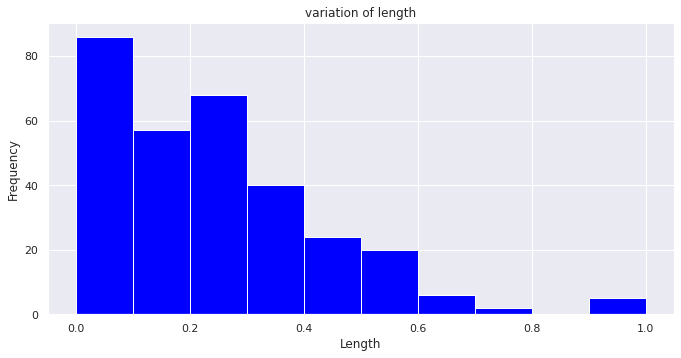

In [ ]:
#variation of len in the train data

train.groupby('len').mean()['video'].plot.hist(color ='blue',figsize = (10,5))
plt.title('variation of length')
plt.xlabel('Length')
plt.show()

In [ ]:
# tokenizing the words present in the training set
tokenized_tweet = train['tweet'].apply(lambda x: x.split()) 

# importing gensim
import gensim

# creating a word to vector model
model_w2v = gensim.models.Word2Vec(
            tokenized_tweet,
            size=200, # desired no. of features/independent variables 
            window=5, # context window size
            min_count=2,
            sg = 1, # 1 for skip-gram model
            hs = 0,
            negative = 10, # for negative sampling
            workers= 2, # no.of cores
            seed = 34)

model_w2v.train(tokenized_tweet, total_examples= len(train['tweet']), epochs=20)

(62927596, 78957780)

In [ ]:
model_w2v.wv.most_similar(positive = "hurricane")


[('Hurricane', 0.6178480386734009),
 ('a', 0.6007472276687622),
 ('hurricane,', 0.5767987370491028),
 ('us)', 0.5752251744270325),
 ('😮\u200d💨🥴🥴', 0.5727463364601135),
 ('sad.😭', 0.5690870881080627),
 ('hurricane.🤣🤣🤣🤣😈😈😈😈', 0.5676811337471008),
 ('😩💯', 0.5595639944076538),
 ('storm/hurricane', 0.5562617182731628),
 ('night/morn', 0.553983211517334)]

In [ ]:
from tqdm import tqdm
tqdm.pandas(desc="progress-bar")
from gensim.models.doc2vec import LabeledSentence

In [ ]:
def add_label(twt):
    output = []
    for i, s in zip(twt.index, twt):
        output.append(LabeledSentence(s, ["tweet_" + str(i)]))
    return output

# label all the tweets
labeled_tweets = add_label(tokenized_tweet)

labeled_tweets[:6]

[LabeledSentence(words=['Do', 'you', 'need', 'to', 'talk', 'to', 'someone', 'after', '#Hurricanelan?', '@user', 'has', 'a', 'Disaster', 'Distress', 'Hotline', 'that', 'you', 'can', 'call', 'or', 'text', '0-0-0-0.', 'This', 'hotline', 'is', 'available', '0/0.', 'Do', 'not', 'hesitate', 'to', 'reach', 'out', 'and', 'talk', 'to', 'someone.', '#lanRecovery', '*', '#Do', 'you', 'need', 'to', 'talk', 'to', 'someone', 'after', '#Hurricanelan?', '@user', 'has', 'a', 'Disaster', 'Distress', 'Hotline', 'that', 'you', 'can', 'call', 'or', 'text', '0-0-0-0.', 'This', 'hotline', 'is', 'available', '0/0.', 'Do', 'not', 'hesitate', 'to', 'reach', 'out', 'and', 'talk', 'to', 'someone.', '#lanRecovery', '*'], tags=['tweet_0']),
 LabeledSentence(words=['Do', 'you', 'need', 'to', 'talk', 'to', 'someone', 'after', '#Hurricanelan?', '@user', 'has', 'a', 'Disaster', 'Distress', 'Hotline', 'that', 'you', 'can', 'call', 'or', 'text', '0-0-0-0.', 'This', 'hotline', 'is', 'available', '0/0.', 'Do', 'not', 'hesi

In [ ]:
# removing unwanted patterns from the data

import re
import nltk

nltk.download('stopwords')
from nltk.corpus import stopwords
from nltk.stem.porter import PorterStemmer

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [ ]:
tweets

In [ ]:
for i,n in enumerate(train['tweet']):
  print(train['tweet'][i])
  break

Do you need to talk to someone after #Hurricanelan? @user has a Disaster Distress Hotline that you can call or text 0-0-0-0. This hotline is available 0/0. Do not hesitate to reach out and talk to someone. #lanRecovery * #Do you need to talk to someone after #Hurricanelan? @user has a Disaster Distress Hotline that you can call or text 0-0-0-0. This hotline is available 0/0. Do not hesitate to reach out and talk to someone. #lanRecovery *


In [ ]:
train_corpus = []

for i,n in enumerate(train['tweet']):
  try:
    review = re.sub('[^a-zA-Z]', ' ', train['tweet'][i])
    review = review.lower()
    review = review.split()
    
    ps = PorterStemmer()
    # stemming
    review = [ps.stem(word) for word in review if not word in set(stopwords.words('english'))]
    
    # joining them back with space
    review = ' '.join(review)
    train_corpus.append(review)
  except:
    print(i)
  

In [ ]:
len(train_corpus)

86783

In [ ]:
test_corpus = []

for i in range(len(test)):
  try:
    review = re.sub('[^a-zA-Z]', ' ', test['tweet'][i+num_test])
    review = review.lower()
    review = review.split()
    
    ps = PorterStemmer()
    # stemming
    review = [ps.stem(word) for word in review if not word in set(stopwords.words('english'))]
    
    # joining them back with space
    review = ' '.join(review)
    test_corpus.append(review)
  except:
    print(i)
  
 

In [ ]:
# creating bag of words for train
# creating bag of words

from sklearn.feature_extraction.text import CountVectorizer

cv = CountVectorizer(max_features = 1000)
x = cv.fit_transform(train_corpus).toarray()
y = train['video']
y.drop(y.index[[2528,2529]], inplace=True)

print(x.shape)
print(y.shape)


(86783, 1000)
(86781,)


In [ ]:
# creating bag of words for test
from nltk import corpus
from sklearn.feature_extraction.text import CountVectorizer

cv = CountVectorizer(max_features = 1500)
x_test = cv.fit_transform(test_corpus).toarray()


print(x_test.shape)

(43391, 1500)


In [ ]:
import sklearn
from sklearn.model_selection import train_test_split
x_train, x_valid, y_train, y_valid = train_test_split(x[2:], y, test_size = 0.25, random_state = 42)

print(x_train.shape)
print(x_valid.shape)
print(y_train.shape)
print(y_valid.shape)

(65085, 1000)
(21696, 1000)
(65085,)
(21696,)


In [ ]:
y

0       1.0
1       1.0
2       0.0
3       0.0
4       1.0
       ... 
3473    0.0
3474    0.0
3475    0.0
3476    0.0
3477    0.0
Name: video, Length: 3474, dtype: float64

In [ ]:
x_valid

array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]])

In [ ]:
y_valid

3005    1.0
1681    0.0
812     0.0
2868    0.0
229     0.0
       ... 
1483    0.0
695     0.0
2847    1.0
700     0.0
420     1.0
Name: video, Length: 869, dtype: float64

In [ ]:
# standardization

from sklearn.preprocessing import StandardScaler

sc = StandardScaler()

x_train = sc.fit_transform(x_train)
x_valid = sc.transform(x_valid)


In [ ]:
np.isnan(x_train).any()

False

In [ ]:
np.isnan(y_train).any()

False

In [ ]:
y_train

682     1.0
1877    1.0
460     0.0
43      1.0
87      1.0
       ... 
1095    0.0
1130    0.0
1294    0.0
860     0.0
3178    1.0
Name: video, Length: 2605, dtype: float64

In [ ]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import confusion_matrix
from sklearn.metrics import f1_score

model = RandomForestClassifier()
model.fit(x_train, y_train)

y_pred = model.predict(x_valid)

print("Training Accuracy :", model.score(x_train, y_train))
print("Validation Accuracy :", model.score(x_valid, y_valid))

# calculating the f1 score for the validation set


Training Accuracy : 0.9773065990627641
Validation Accuracy : 0.8334716076696165


In [ ]:
# confusion matrix
cm = confusion_matrix(y_valid, y_pred)
print(cm)

[[16690   702]
 [ 2911  1393]]


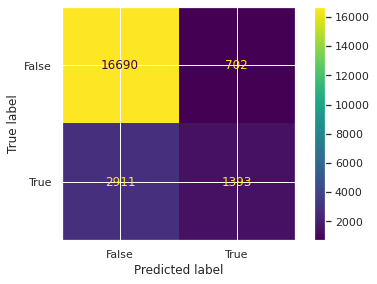

In [ ]:
import matplotlib.pyplot as plt
import numpy
from sklearn import metrics



cm_display = metrics.ConfusionMatrixDisplay(confusion_matrix = cm, display_labels = [False, True])

cm_display.plot()
plt.show()

In [ ]:
from sklearn.tree import DecisionTreeClassifier

model = DecisionTreeClassifier()
model.fit(x_train, y_train)

y_pred = model.predict(x_valid)

print("Training Accuracy :", model.score(x_train, y_train))
print("Validation Accuracy :", model.score(x_valid, y_valid))


# confusion matrix
cm = confusion_matrix(y_valid, y_pred)
print(cm)

Training Accuracy : 0.9773219635860797
Validation Accuracy : 0.7869653392330384
[[15300  2092]
 [ 2530  1774]]


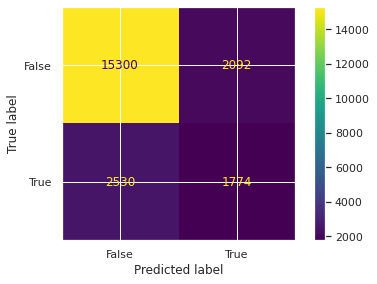

In [ ]:

cm_display = metrics.ConfusionMatrixDisplay(confusion_matrix = cm, display_labels = [False, True])

cm_display.plot()
plt.show()